In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(X)



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
# create a column header
header = ['age', 'sex', 'bmi', 'bp', 't_cell', 'ldl', 'hdl', 'tsh', 'ltg', 'bs', 'cluster']

# create the cluster predictions 
labels = gmm.predict(X)

db_df = pd.DataFrame(X)  
db_df['cluster'] = labels
db_df.columns = header

db_df.head

<bound method NDFrame.head of           age       sex       bmi  ...       ltg        bs  cluster
0    0.038076  0.050680  0.061696  ...  0.019908 -0.017646        2
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204        1
2    0.085299  0.050680  0.044451  ...  0.002864 -0.025930        2
3   -0.089063 -0.044642 -0.011595  ...  0.022692 -0.009362        5
4    0.005383 -0.044642 -0.036385  ... -0.031991 -0.046641        5
..        ...       ...       ...  ...       ...       ...      ...
437  0.041708  0.050680  0.019662  ...  0.031193  0.007207        2
438 -0.005515  0.050680 -0.015906  ... -0.018118  0.044485        2
439  0.041708  0.050680 -0.015906  ... -0.046879  0.015491        2
440 -0.045472 -0.044642  0.039062  ...  0.044528 -0.025930        5
441 -0.045472 -0.044642 -0.073030  ... -0.004220  0.003064        1

[442 rows x 11 columns]>

In [6]:
from scipy.stats import ttest_ind

def do_ttest(df, cluster_1, cluster_2, feature):
  cls1 = df[df['cluster']==cluster_1][feature]
  cls2 = df[df['cluster']==cluster_2][feature]
  ttest, pval = ttest_ind(cls1,cls2)
  return pval

answer = do_ttest(db_df, 2, 5, 'age')

In [7]:
print(answer)  

1.0410328820419568e-06


In [8]:
df_new = db_df[db_df['cluster'].isin([1, 3])]
print(df_new)

          age       sex       bmi  ...       ltg        bs  cluster
1   -0.001882 -0.044642 -0.051474  ... -0.068330 -0.092204        1
21  -0.085430  0.050680 -0.022373  ... -0.072128 -0.017646        3
33   0.030811 -0.044642 -0.050396  ... -0.018118  0.003064        1
35   0.048974  0.050680 -0.030996  ...  0.021311  0.019633        1
43   0.019913 -0.044642 -0.023451  ... -0.042572  0.073480        1
55  -0.041840 -0.044642 -0.049318  ... -0.066488  0.007207        1
58   0.041708 -0.044642 -0.064408  ... -0.000609 -0.050783        1
62  -0.027310  0.050680 -0.007284  ... -0.082381 -0.025930        3
82  -0.016412 -0.044642 -0.035307  ... -0.070209 -0.079778        1
86  -0.070900  0.050680 -0.075186  ... -0.096433 -0.034215        3
110  0.041708  0.050680 -0.032073  ... -0.126097  0.015491        3
133 -0.041840  0.050680 -0.053630  ... -0.072128 -0.030072        3
166 -0.056370  0.050680 -0.060097  ... -0.078141 -0.104630        3
170  0.023546  0.050680 -0.020218  ... -0.096433

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def cluster_full(df, feature, cluster):
  fig, ax = plt.subplots()
  sns.boxplot(x=cluster, y=feature, data=df, ax=ax)
  plt.savefig('full_cluster.png')


def two_way_cluster(df, group1, group2, feature, cluster):
  fig, ax = plt.subplots()
  df_plot = df[df[cluster].isin([group1, group2])]
  sns.boxplot(x=cluster, y=feature, data=df_plot, ax=ax)
  plt.savefig('two_cluster.png')


In [14]:
#sns.histplot(data=db_df, x="bmi", hue="cluster")

def hex(df, feat1, feat2):
  ax = sns.jointplot(x='age', y='bs', data=db_df, kind='scatter', hue='cluster')
  #fig = ax.get_figure()
  ax.savefig('hex.png')

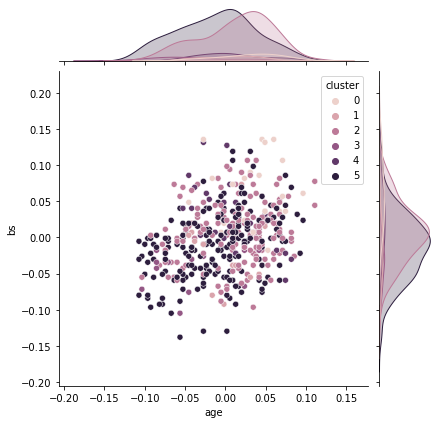

In [15]:
hex(db_df, 'bmi', 'bs', )

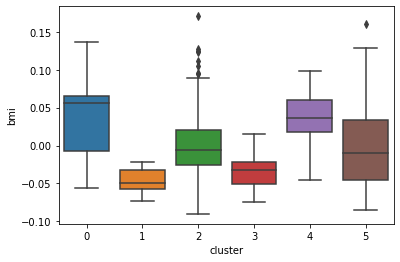

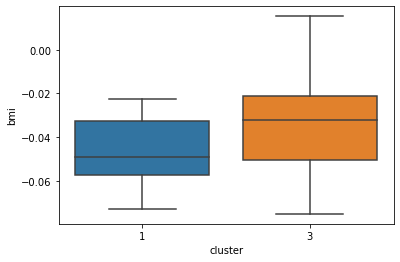

In [16]:
cluster_full(db_df, 'bmi', 'cluster')
two_way_cluster(db_df, 1, 3, 'bmi', 'cluster')
#sns.boxplot(x='cluster', y='bmi', data=db_df)

In [17]:
check = db_df['age'].mean()
print(check)

-3.6342849293088766e-16


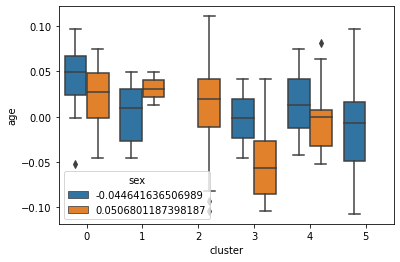

In [18]:
sns.boxplot(x='cluster', y='age', data=db_df, hue='sex')

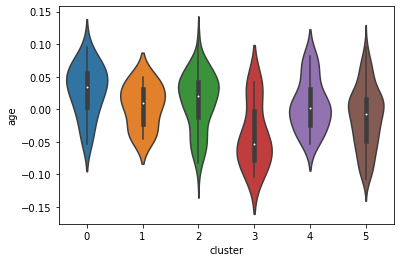

In [19]:
sns.violinplot(x='cluster', y='age', data=db_df)

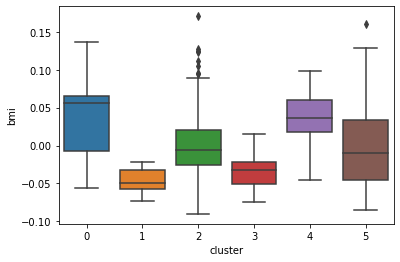

In [20]:
sns.boxplot(x='cluster', y='bmi', data=db_df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


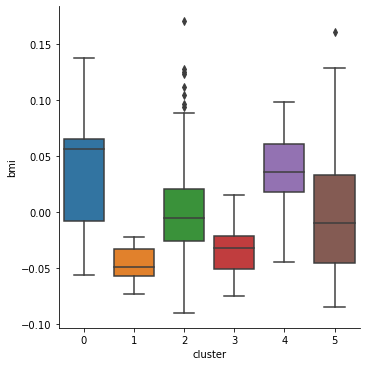

In [21]:
sns.factorplot(x='cluster', y='bmi', data=db_df, kind='box')